In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hilongnguyn/human-crowd-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.08G/1.08G [00:12<00:00, 94.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hilongnguyn/human-crowd-dataset/versions/1


In [2]:
!mv /root/.cache/kagglehub/datasets/hilongnguyn/human-crowd-dataset/versions/1 /content

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.7 MB/s eta 0:00:00


In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/dataset',
      'train': 'train',
      'val': 'val',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

In [4]:
!yolo detect train data=/content/dataset/data.yaml model=yolov8n.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fal

In [5]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/dataset/valid/images save=True

Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/4810 /content/dataset/valid/images/273271-1017c000ac1360b7_jpg.rf.e3cd882b4ad623a1178f7751ebe54df7.jpg: 640x640 11 heads, 14 persons, 8.3ms
image 2/4810 /content/dataset/valid/images/273271-10355000e3a458a6_jpg.rf.55e24d1c7985c2a655657cba979d3808.jpg: 640x640 15 heads, 15 persons, 7.3ms
image 3/4810 /content/dataset/valid/images/273271-1050b000e40d8e93_jpg.rf.197cebd7cd7a6d037b81c9bc54bf0e0b.jpg: 640x640 15 heads, 16 persons, 7.2ms
image 4/4810 /content/dataset/valid/images/273271-105b40008a7b8b1f_jpg.rf.1b3dca2f4630187ca3b095893211ac5c.jpg: 640x640 27 heads, 70 persons, 7.2ms
image 5/4810 /content/dataset/valid/images/273271-118910008d823f61_jpg.rf.13b6092a0d1cf8eb873901d508d62734.jpg: 640x640 6 heads, 6 persons, 7.2ms
image 6/4810 /content/dataset/valid/images/273271-122b200079740e5d_jpg.rf.e9c1a9bb25a747d40506c743

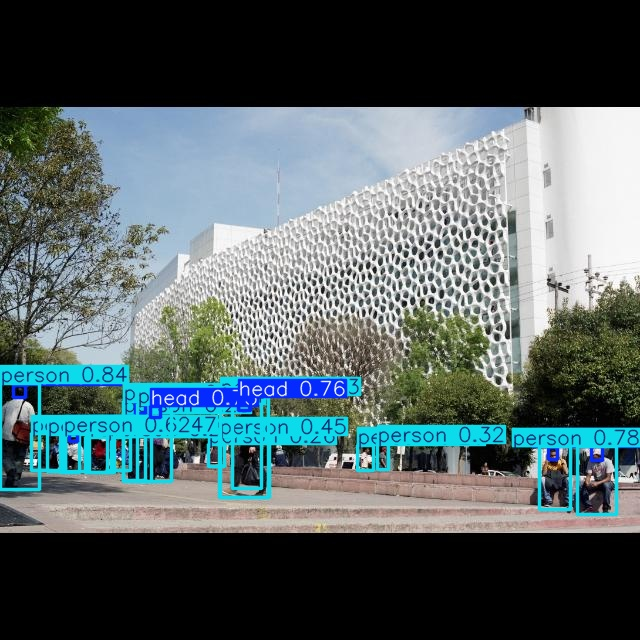

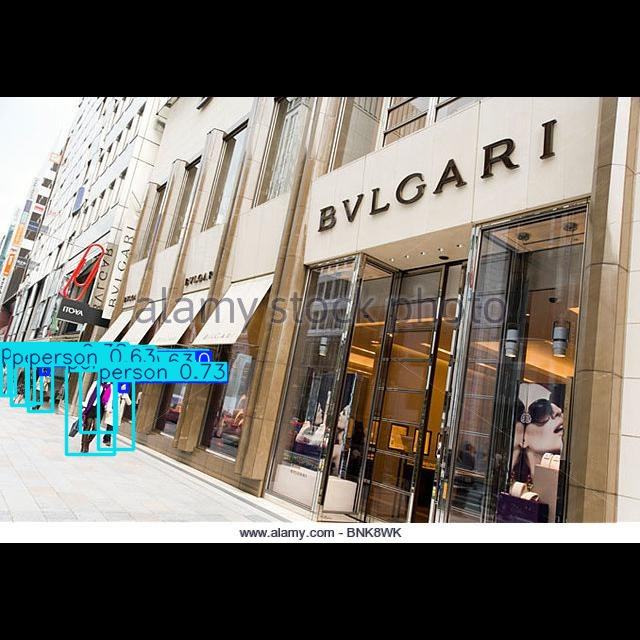

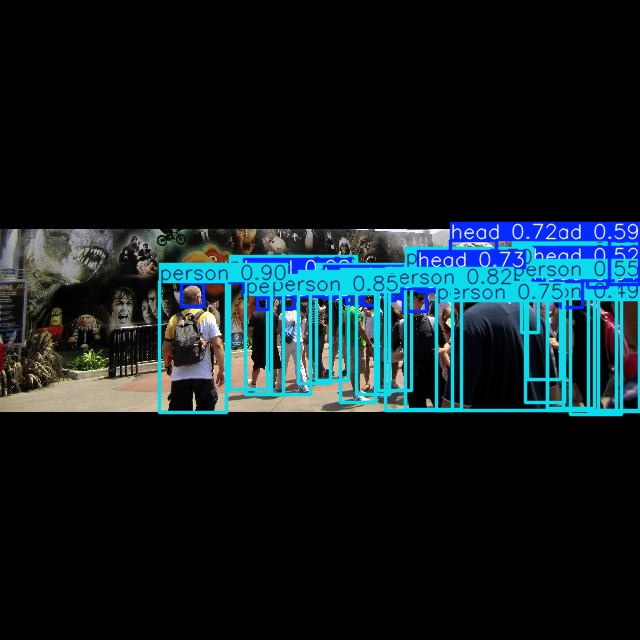

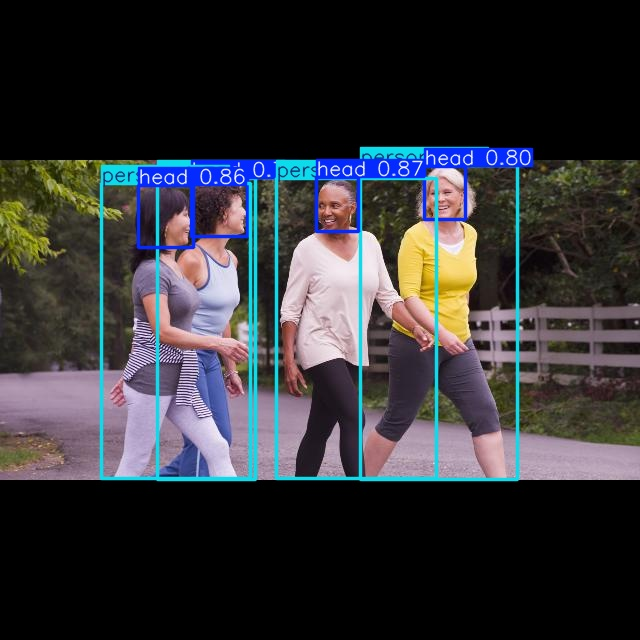

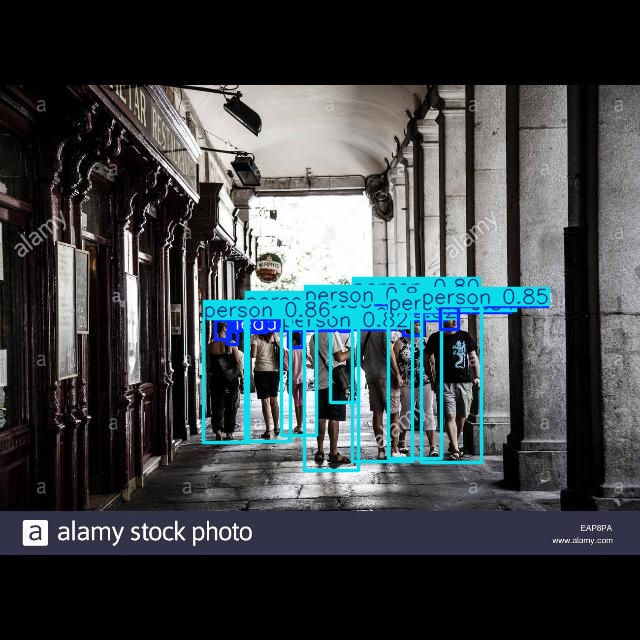

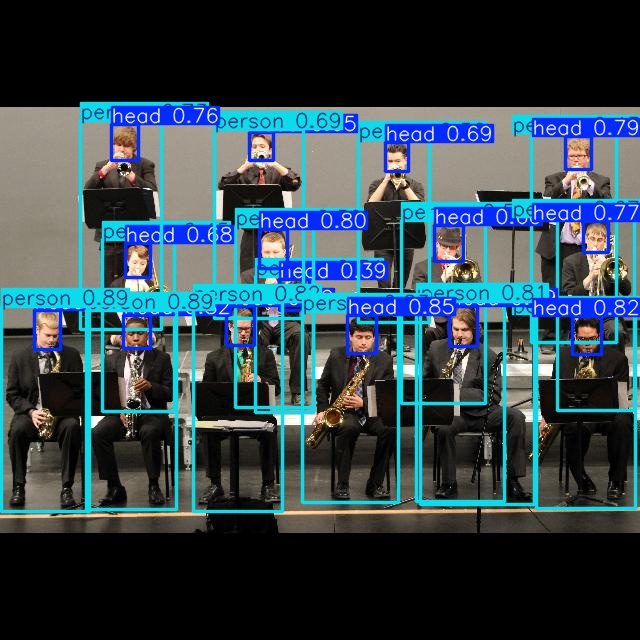

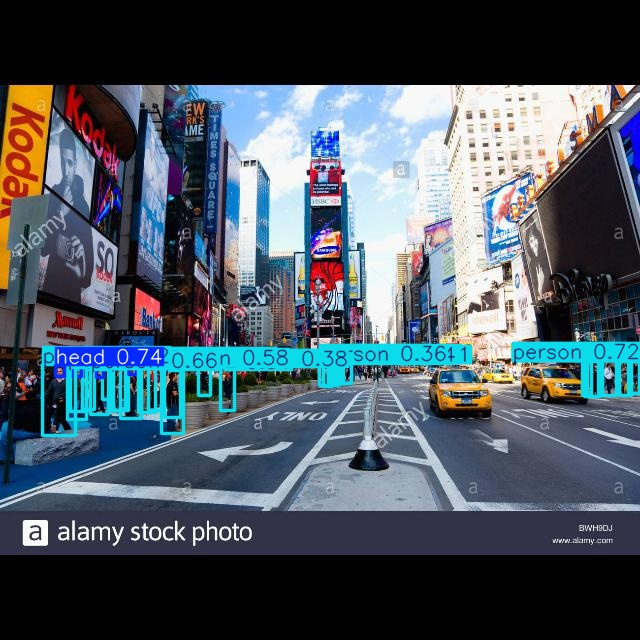

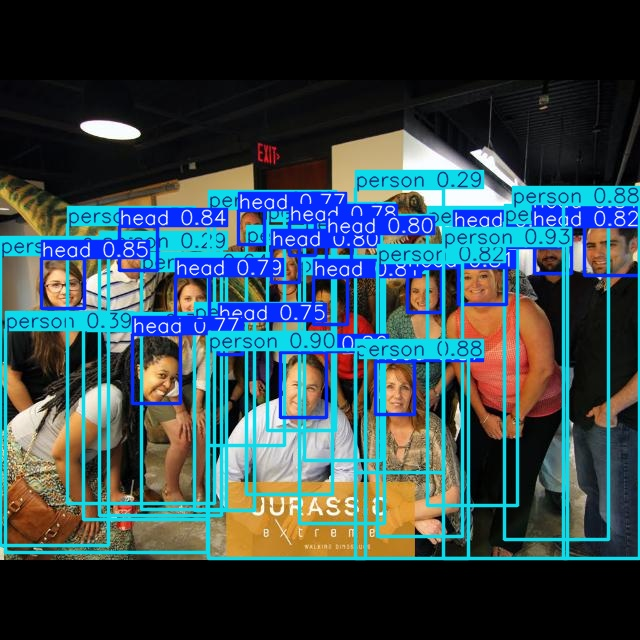

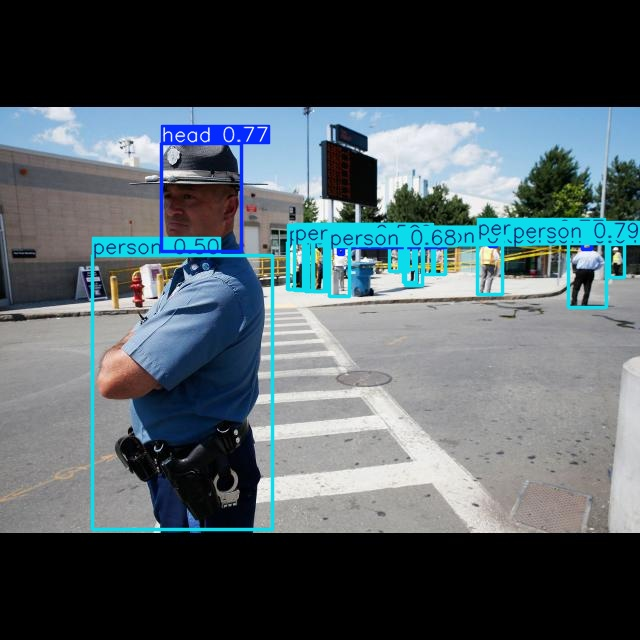

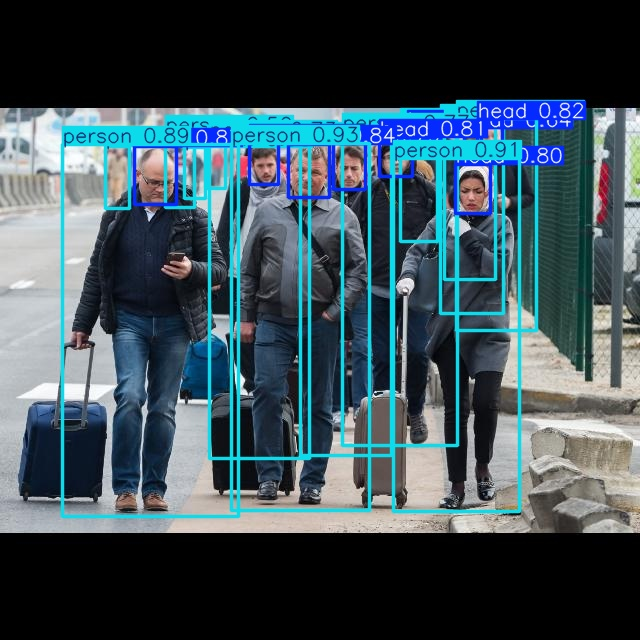

In [6]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')